### Pandas怎样快捷方便的处理日期数据
几个概念：
+ pd.to_datetime: pandas的一个函数，能将list,string,series变成日期格式
+ timestamp:pandas表示日期的对象形式
+ datatimeIndex:pandas表示日期的对象列表形式
+ pd.to_datetime() 对单个日期字符串处理会得到timestamp
+ pd.to_datetime对日期字符串列表处理会得到dateIndex

### 问题：怎样统计每月，每季，每周的最高温度
+ **关键**在于通过groupby(df.index.week）给数据分组

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fpath = "./datas/beijing_tianqi/beijing_tianqi_2018.csv"
df = pd.read_csv(fpath)
# 替换掉温度的后缀℃
df.loc[:, "bWendu"] = df["bWendu"].str.replace("℃", "").astype('int32')
df.loc[:, "yWendu"] = df["yWendu"].str.replace("℃", "").astype('int32')
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
0,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2
1,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1
2,2018-01-03,2,-5,多云,北风,1-2级,28,优,1
3,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1
4,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1


####  统计每月最高温度
timedata_index是timestamp的列表形式

In [3]:
df.set_index(pd.to_datetime(df["ymd"]),inplace=True)  # 将日期作为index
df.head()


,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
ymd,,,,,,,,,
2018-01-01,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2
2018-01-02,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1
2018-01-03,2018-01-03,2,-5,多云,北风,1-2级,28,优,1
2018-01-04,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1
2018-01-05,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1


In [4]:
# 如果我要查询一年中为”优良”的天数
aqi_table=df.loc[:,"aqiInfo"].value_counts()
type(aqi_table)

pandas.core.series.Series

In [5]:
df.loc["2018-01-01",:]  # 默认是index

ymd          2018-01-01
bWendu                3
yWendu               -6
tianqi             晴~多云
fengxiang           东北风
fengli             1-2级
aqi                  59
aqiInfo               良
aqiLevel              2
Name: 2018-01-01 00:00:00, dtype: object

#### datatime_index的好处是按照日期筛选


In [6]:
df.loc["2018-04"]

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
ymd,,,,,,,,,
2018-04-01,2018-04-01,25,11,晴~多云,南风,1-2级,218,重度污染,5
2018-04-02,2018-04-02,26,11,多云,北风,1-2级,287,重度污染,5
2018-04-03,2018-04-03,14,6,多云~阴,东北风,3-4级,80,良,2
2018-04-04,2018-04-04,10,1,小雨~雨夹雪,东北风,1-2级,35,优,1
2018-04-05,2018-04-05,10,3,多云,西南风,1-2级,73,良,2
2018-04-06,2018-04-06,11,4,多云~晴,北风,4-5级,86,良,2
2018-04-07,2018-04-07,12,2,多云~晴,西北风,3-4级,42,优,1
2018-04-08,2018-04-08,18,5,晴,西南风,1-2级,68,良,2
2018-04-09,2018-04-09,20,7,晴~多云,南风,1-2级,111,轻度污染,3


In [7]:
type(df.index)  # datetimeIndex格式的数据有大量的时间属性

pandas.core.indexes.datetimes.DatetimeIndex

In [8]:
df["new_time"]=pd.to_datetime(df["ymd"])
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel,new_time
ymd,,,,,,,,,,
2018-01-01,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2,2018-01-01
2018-01-02,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1,2018-01-02
2018-01-03,2018-01-03,2,-5,多云,北风,1-2级,28,优,1,2018-01-03
2018-01-04,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1,2018-01-04
2018-01-05,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1,2018-01-05


In [9]:
type(df["new_time"])
print(df.index.week)

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
            ...
            51, 51, 52, 52, 52, 52, 52, 52, 52,  1],
           dtype='int64', name='ymd', length=365)


#### 统计一年中每周最高温度的变化趋势图


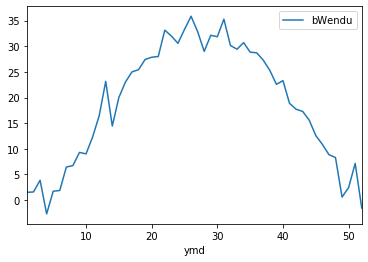

In [10]:
# 按照周分组，每个周agg出平均温度
df_week=df.groupby(df.index.week).agg({"bWendu":np.mean})
df_week.plot()

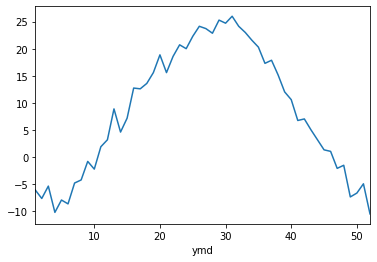

In [11]:
df_week1=df.groupby(df.index.week)["yWendu"].agg(np.mean)
df_week1.plot()

In [15]:
df_week.head()


,bWendu
ymd,
1,1.500000
2,1.571429
3,3.857143
4,-2.714286
5,1.714286


In [19]:
df_merge=pd.merge(df_week,df_week1,left_on="ymd",right_on="ymd",how="inner")
df_merge.head()

,bWendu,yWendu
ymd,,
1,1.500000,-6.125000
2,1.571429,-7.714286
3,3.857143,-5.428571
4,-2.714286,-10.285714
5,1.714286,-8.000000


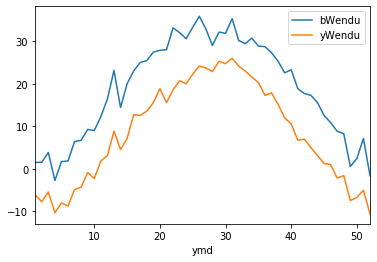

In [20]:
df_merge.plot()  # 自动赋值两个y轴